# Hamiltonian Monte Carlo

## Introduction to Mathematical Expressions with Theano

Theano is a Python library that allows you to define, optimize, and evaluate mathematical expressions involving multi-dimensional arrays efficiently. Theano features:

* __tight integration with numpy__ – Use numpy.ndarray in Theano-compiled functions.
* __transparent use of a GPU__ – Perform data-intensive calculations up to 140x faster than with CPU.(float32 only)
* __efficient symbolic differentiation__ – Theano does your derivatives for function with one or many inputs.
* __speed and stability optimizations__ – Get the right answer for log(1+x) even when x is really tiny.
* __dynamic C code generation__ – Evaluate expressions faster.
* __extensive unit-testing and self-verification__ – Detect and diagnose errors.

### Installing Theano

The easiest way to install Theano is to build it from source, using **pip**:

    pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

## Adding Two Scalars

To get us started with Theano and get a feel of what we're working with, 
let's make a simple function: add two numbers together. Here is how you do
it:

### Step 1 - Declaring Variables

In [1]:
from theano import function, shared
from theano import tensor as T
import theano

x = T.dscalar('x')
y = T.dscalar('y')

In Theano, all symbols must be typed. In particular, `T.dscalar`
is the type we assign to "0-dimensional arrays (`scalar`) of doubles
(`d`)". It is a Theano `type`.

In [2]:
print type(x)

<class 'theano.tensor.var.TensorVariable'>


In [3]:
print x.type

TensorType(float64, scalar)


In [4]:
print T.dscalar

TensorType(float64, scalar)


### Step 2 - Symbolic Expressions

The second step is to combine *x* and *y* into their sum *z*:

In [5]:
z = x + y

*z* is yet another *Variable* which represents the addition of
*x* and *y*. You can use the `pp` function to *pretty-print* out the computation associated to *z*.


In [6]:
from theano.printing import pp
print pp(z)

(x + y)


### Step 3 - Compiling a Function

The last step is to create a function taking *x* and *y* as inputs
and giving *z* as output:

In [7]:
f = function([x, y], z)

The first argument to `function()` is a list of Variables
that will be provided as inputs to the function. The second argument
is a single Variable *or* a list of Variables. For either case, the second
argument is what we want to see as output when we apply the function. *f* may
then be used like a normal Python function.


Now we can call the function:

In [8]:
print f(2, 3)
print f(16.3, 12.1)

5.0
28.4


If you are following along and typing into an interpreter, you may have
noticed that there was a slight delay in executing the ``function``
instruction. Behind the scene, *f* was being compiled into C code.

A *Variable* is the main data structure you work with when
using Theano. By calling `T.dscalar` with a string argument, you create a
`Variable` representing a floating-point scalar quantity with the
given name. If you provide no argument, the symbol will be unnamed. Names
are not required, but they can help debugging.

## Adding Two Matrices

If we want to work with matrices instead of scalars, the only change
from the previous example is that you need to instantiate *x* and
*y* using the matrix Types:

In [9]:
x = T.dmatrix('x')
y = T.dmatrix('y')
z = x + y
f = function([x, y], z)

``dmatrix`` is the Type for matrices of doubles. Then we can use
our new function on 2D arrays:


In [10]:
f([[1, 2], [3, 4]], [[10, 20], [30, 40]])

array([[ 11.,  22.],
       [ 33.,  44.]])

The following types are available:

* **byte**: ``bscalar, bvector, bmatrix, brow, bcol, btensor3, btensor4``
* **16-bit integers**: ``wscalar, wvector, wmatrix, wrow, wcol, wtensor3, wtensor4``
* **32-bit integers**: ``iscalar, ivector, imatrix, irow, icol, itensor3, itensor4``
* **64-bit integers**: ``lscalar, lvector, lmatrix, lrow, lcol, ltensor3, ltensor4``
* **float**: ``fscalar, fvector, fmatrix, frow, fcol, ftensor3, ftensor4``
* **double**: ``dscalar, dvector, dmatrix, drow, dcol, dtensor3, dtensor4``
* **complex**: ``cscalar, cvector, cmatrix, crow, ccol, ctensor3, ctensor4``

An example of a slightly more interesting function is the logistic curve:

In [11]:
x = T.dmatrix('x')

The logistic transformation:

In [12]:
s = 1 / (1 + T.exp(-x))

In [13]:
logistic = function([x], s)
print logistic([[0, 1], [-1, -2]])

[[ 0.5         0.73105858]
 [ 0.26894142  0.11920292]]


Theano supports functions with multiple outputs. For example, we can
compute the elementwise difference, absolute difference, and
squared difference between two matrices *a* and *b* at the same time.

In [14]:
a, b = T.dmatrices('a', 'b')
diff = a - b
abs_diff = abs(diff)
diff_squared = diff ** 2

When we use the function `f`, it returns the three computed results as a list.

In [15]:
f = function([a, b], [diff, abs_diff, diff_squared])

print f([[1, 1], [1, 1]], [[0, 1], [2, 3]])

[array([[ 1.,  0.],
       [-1., -2.]]), array([[ 1.,  0.],
       [ 1.,  2.]]), array([[ 1.,  0.],
       [ 1.,  4.]])]


## Setting a Default Value for an Argument
 
Let's say you want to define a function that adds two numbers, except
that if you only provide one number, the other input is assumed to be
one. In Python, the default value for parameters achieves this effect.
In Theano you can achieve this effect with a `Param` object.

This makes use of the <a href="http://deeplearning.net/software/theano/library/compile/io.html#function-inputs">Param</a> class which allows
you to specify properties of your function's parameters with greater detail. Here we
give a default value of 1 for *y* by creating a ``Param`` instance with
its ``default`` field set to 1. Inputs with default values must follow inputs without default
values (like Python's functions).  There can be multiple inputs with default values. These parameters can
be set positionally or by name, as in standard Python.

In [16]:
from theano import Param

x, y, w = T.dscalars('x', 'y', 'w')
z = (x + y) * w
g = function([x, Param(y, default=1), Param(w, default=2, name='w_by_name')], z)

In [17]:
print('g(33) = {}'.format(g(33)))
print('g(33, 0, 1) = {}'.format(g(33, 0, 1)))
print('g(33, w_by_name=1) = {}'.format(g(33, w_by_name=1)))
print('g(33, w_by_name=1, y=0) = {}'.format(g(33, w_by_name=1, y=0)))

g(33) = 68.0
g(33, 0, 1) = 33.0
g(33, w_by_name=1) = 34.0
g(33, w_by_name=1, y=0) = 33.0


## Maintaining State with Shared Variables

It is also possible to make a function with an internal state. For example, let’s say we want to make an accumulator: at the beginning, the state is initialized to zero. Then, on each function call, the state is incremented by the function’s argument.

First let’s define the accumulator function. It adds its argument to the internal state, and returns the old state value.

In [18]:
state = shared(0)
inc = T.iscalar('inc')
accumulator = function([inc], state, updates=[(state, state+inc)])

This code introduces a few new concepts. The `shared` function constructs so-called shared variables. 

    state = shared(0)

These are hybrid symbolic and non-symbolic variables whose value may be shared between multiple functions. Shared variables can be used in symbolic expressions but they also have an internal value that defines the value taken by this symbolic variable in all the functions that use it. It is called a shared variable because its value is shared between many functions. The value can be accessed and modified by the `get_value` and `set_value` methods.

The other new thing in this code is the `updates` parameter of function. 

    updates=[(state, state+inc)

`updates` must be supplied with a list of pairs of the form `(shared-variable, new expression)`. It can also be a dictionary whose keys are shared-variables and values are the new expressions. Here, the accumulator replaces the `state`‘s value with the sum of `state` and the increment amount `inc`.

In [19]:
print state.get_value()

0


In [20]:
print accumulator(1)

0


In [21]:
print state.get_value()

1


In [22]:
print accumulator(300)

1


In [23]:
print state.get_value()

301


It is possible to reset the state. Just use the `set_value` method:

In [24]:
state.set_value(-1)

In [25]:
print accumulator(3)

-1


In [26]:
print state.get_value()

2


As we mentioned above, you can define more than one function to use the same shared variable. These functions can all update the value.

In [28]:
decrementor = function([inc], state, updates=[(state, state-inc)])

In [29]:
print decrementor(2)

2


In [30]:
print state.get_value()

0


You might be wondering why the updates mechanism exists. You can always achieve a similar result by returning the new expressions, and working with them in NumPy as usual. While the updates mechanism can be a syntactic convenience, it is mainly there for *efficiency*. Updates to shared variables can sometimes be done more quickly using in-place algorithms (e.g. low-rank matrix updates). Also, Theano has more control over where and how shared variables are allocated, which is one of the important elements of getting good performance on the GPU.

### Exercise: Create and manipulate Theano objects

To give you some practice with basic Theano data structures and functions, try making the operations below work by implementing the functions that are needed.

In [30]:
def make_vector():
    """
    Create and return a new Theano vector.
    """

    pass

def make_matrix():
    """
    Create and return a new Theano matrix.
    """

    pass

def elemwise_mul(a, b):
    """
    a: A theano matrix
    b: A theano matrix
    
    Calcuate the elementwise product of a and b and return it
    """

    pass

def matrix_vector_mul(a, b):
    """
    a: A theano matrix
    b: A theano vector
    
    Calculate the matrix-vector product of a and b and return it
    """

    pass

a = make_vector()
b = make_vector()
c = elemwise_mul(a, b)
d = make_matrix()
matrix_vector_mul(d, c)

### Example: Logistic regression

Here is a non-trivial example, which uses Theano to estimate the parameters of a logistic regression model using gradient information. We will use the bioassay example as a test case:

In [31]:
import numpy as np
rng = np.random

dose = np.array([-0.86, -0.3 , -0.05,  0.73])
deaths = np.array([0, 1, 3, 5])
training_steps = 1000

# Declare Theano symbolic variables
x = T.vector("x")
y = T.vector("y")
w = theano.shared(1., name="w")
b = theano.shared(0., name="b")
print "Initial model:"
print w.get_value(), b.get_value()

# Construct Theano expression graph
p_1 = 1 / (1 + T.exp(-(x*w + b)))             # Probability that target = 1
prediction = p_1 > 0.5                        # The prediction thresholded
xent = -y * T.log(p_1) - (5-y) * T.log(1-p_1) # Cross-entropy loss function
cost = xent.mean()                            # The cost to minimize
gw,gb = T.grad(cost, [w, b])                  # Compute the gradient of the cost

Initial model:
1.0 0.0


In [32]:
# Compile
step = theano.shared(10., name='step')
train = theano.function(
          inputs=[x, y],
          outputs=[prediction, xent],
          updates=((w, w - step * gw), (b, b - step * gb), (step, step * 0.99)))
predict = theano.function(inputs=[x], outputs=prediction)

In [33]:
# Train
for i in range(training_steps):
    pred, err = train(dose, deaths)

print "Final model:"
print w.get_value(), b.get_value()

Final model:
7.79515245752 0.853642024966


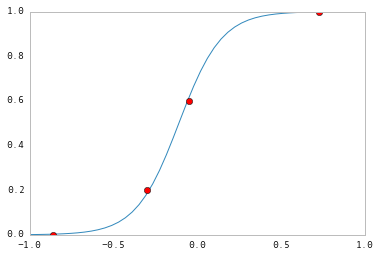

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

logit = lambda x: 1. / (1 + np.exp(-x))
xvals = np.linspace(-1, 1)
plt.plot(xvals, logit(7.8*xvals + .85))
plt.plot(dose, deaths/5., 'ro')

### Random Numbers

Because in Theano you first express everything symbolically and afterwards compile this expression to get functions, using pseudo-random numbers is not as straightforward as it is in NumPy.

The way to think about putting randomness into Theano’s computations is to put random variables in your graph. Theano will allocate a NumPy `RandomStream` object (a random number generator) for each such variable, and draw from it as necessary. We will call this sort of sequence of random numbers a random stream. Random streams are at their core shared variables, so the observations on shared variables hold here as well. 

In [35]:
from theano.tensor.shared_randomstreams import RandomStreams

srng = RandomStreams(seed=234)
rv_u = srng.uniform((2,2))
f = function([], rv_u)

In [36]:
f()

array([[ 0.12672381,  0.97091597],
       [ 0.13989098,  0.88754825]])

In [37]:
f()

array([[ 0.31971415,  0.47584377],
       [ 0.24129163,  0.42046081]])

## Hamiltonian Monte Carlo

While flexible and easy to implement, Metropolis-Hastings sampling is a random walk
sampler that might not be statistically efficient for many models. In
this context, and when sampling from continuous variables, Hamiltonian (or Hybrid) Monte
Carlo (HMC) can prove to be a powerful tool. It avoids
random walk behavior by simulating a physical system governed by
Hamiltonian dynamics, potentially avoiding tricky conditional
distributions in the process.

<img src="http://d.pr/i/RAA+" alt="HMC comparison" style="width: 600px;"/>

In HMC, model samples are obtained by simulating a physical system,
where particles move about a high-dimensional landscape, subject to
potential and kinetic energies. Adapting the notation from [Neal (1993)](http://www.cs.toronto.edu/~radford/review.abstract.html),
particles are characterized by a position vector or state
$s \in \mathcal{R}^D$ and velocity vector $\phi \in \mathcal{R}^D$. The
combined state of a particle is denoted as $\chi=(s,\phi)$. The
Hamiltonian is then defined as the sum of potential energy $E(s)$ and kinetic energy
$K(\phi)$, as follows:

$$\mathcal{H}(s,\phi) = E(s) + K(\phi)
= E(s) + \frac{1}{2} \sum_i \phi_i^2$$

Instead of sampling $p(s)$ directly, HMC operates by sampling from the
canonical distribution
$p(s,\phi) = \frac{1}{Z} \exp(-\mathcal{H}(s,\phi))=p(s)p(\phi)$.
Because the two variables are independent, marginalizing over $\phi$ is
trivial and recovers the original distribution of interest.

**Hamiltonian Dynamics**

State $s$ and velocity $\phi$ are modified such that
$\mathcal{H}(s,\phi)$ remains constant throughout the simulation. The
differential equations are given by:

$$\begin{aligned}\frac{ds_i}{dt} &= \frac{\partial \mathcal{H}}{\partial \phi_i} = \phi_i \\
\frac{d\phi_i}{dt} &= - \frac{\partial \mathcal{H}}{\partial s_i}
= - \frac{\partial E}{\partial s_i}
\end{aligned}$$

As shown in [Neal (1993)](http://www.cs.toronto.edu/~radford/review.abstract.html), 
the above transformation preserves volume and is
reversible. The above dynamics can thus be used as transition operators
of a Markov chain and will leave $p(s,\phi)$ invariant. That chain by
itself is not ergodic however, since simulating the dynamics maintains a
fixed Hamiltonian $\mathcal{H}(s,\phi)$. HMC thus alternates Hamiltonian
dynamic steps, with Gibbs sampling of the velocity. Because $p(s)$ and
$p(\phi)$ are independent, sampling $\phi_{new} \sim p(\phi|s)$ is
trivial since $p(\phi|s)=p(\phi)$, where $p(\phi)$ is often taken to be
the univariate Gaussian.

**The Leap-Frog Algorithm**

In practice, we cannot simulate Hamiltonian dynamics exactly because of
the problem of time discretization. There are several ways one can do
this. To maintain invariance of the Markov chain however, care must be
taken to preserve the properties of *volume conservation* and *time
reversibility*. The **leap-frog algorithm** maintains these properties
and operates in 3 steps:

$$\begin{aligned}
\phi_i(t + \epsilon/2) &= \phi_i(t) - \frac{\epsilon}{2} \frac{\partial{}}{\partial s_i} E(s(t)) \\
s_i(t + \epsilon) &= s_i(t) + \epsilon \phi_i(t + \epsilon/2) \\
\phi_i(t + \epsilon) &= \phi_i(t + \epsilon/2) - \frac{\epsilon}{2} \frac{\partial{}}{\partial s_i} E(s(t + \epsilon)) 
\end{aligned}$$

We thus perform a half-step update of the velocity at time
$t+\epsilon/2$, which is then used to compute $s(t + \epsilon)$ and
$\phi(t + \epsilon)$.

**Accept / Reject**

In practice, using finite stepsizes $\epsilon$ will not preserve
$\mathcal{H}(s,\phi)$ exactly and will introduce bias in the simulation.
Also, rounding errors due to the use of floating point numbers means
that the above transformation will not be perfectly reversible.

HMC cancels these effects **exactly** by adding a Metropolis
accept/reject stage, after $n$ leapfrog steps. The new state
$\chi' = (s',\phi')$ is accepted with probability $p_{acc}(\chi,\chi')$,
defined as:

$$p_{acc}(\chi,\chi') = min \left( 1, \frac{\exp(-\mathcal{H}(s',\phi')}{\exp(-\mathcal{H}(s,\phi)} \right)$$

**HMC Algorithm**

We obtain a new HMC sample as follows:

1.  sample a new velocity from a univariate Gaussian distribution
2.  perform $n$ leapfrog steps to obtain the new state $\chi'$
3.  perform accept/reject move of $\chi'$

Implementing HMC Using Theano
-----------------------------

In Theano, update dictionaries and shared variables provide a natural
way to implement a sampling algorithm. The current state of the sampler
can be represented as a Theano shared variable, with HMC updates being
implemented by the updates list of a Theano function.

We breakdown the HMC algorithm into the following sub-components:

-   `simulate_dynamics`: a symbolic Python function which, given an
    initial position and velocity, will perform `n_steps` leapfrog
    updates and return the symbolic variables for the proposed state
    $\chi'$.
-   `hmc_move`: a symbolic Python function which given a starting
    position, generates $\chi$ by randomly sampling a velocity vector.
    It then calls `simulate_dynamics` and determines whether the
    transition $\chi
    \rightarrow \chi'$ is to be accepted.
-   `hmc_updates`: a Python function which, given the symbolic
    outputs of `hmc_move`, generates the list of updates for a single
    iteration of HMC.
-   `HMC_sampler`: a Python helper class which wraps everything
    together.

**simulate\_dynamics**

To perform $n$ leapfrog steps, we first need to define a function over
which the algorithm can iterate. Instead of implementing leap frog verbatim, notice that we can obtain
$s(t + n \epsilon)$ and $\phi(t + n \epsilon)$ by performing an initial
half-step update for $\phi$, followed by $n$ full-step updates for
$s,\phi$ and one last half-step update for $\phi$. In loop form, this
gives:

$$\begin{aligned}\phi_i(t + \epsilon/2) &= \phi_i(t) -
\frac{\epsilon}{2} \frac{\partial{}}{\partial s_i} E(s(t)) \\
s_i(t + \epsilon) &= s_i(t) + \epsilon \phi_i(t + \epsilon/2) \\
\text{For } m \in [2,n]\text{, perform full updates: } \\
\qquad
\phi_i(t + (m - 1/2)\epsilon) &= \phi_i(t + (m-3/2)\epsilon) -
\epsilon \frac{\partial{}}{\partial s_i} E(s(t + (m-1)\epsilon)) \\
\qquad
s_i(t + m\epsilon) &= s_i(t) + \epsilon \phi_i(t + (m-1/2)\epsilon) \\
\phi_i(t + n\epsilon) &= \phi_i(t + (n-1/2)\epsilon) -
\frac{\epsilon}{2} \frac{\partial{}}{\partial s_i} E(s(t + n\epsilon)) 
\end{aligned}$$

The inner-loop defined above is implemented by the following
`leapfrog` function, with `pos`, `vel` and `step` replacing
$s,\phi$ and $\epsilon$ respectively.

In [35]:
def leapfrog(pos, vel, step):
    """
    Inside loop of Scan. Performs one step of leapfrog update, using
    Hamiltonian dynamics.

    Parameters
    ----------
    pos: theano matrix
        in leapfrog update equations, represents pos(t), position at time t
    vel: theano matrix
        in leapfrog update equations, represents vel(t - stepsize/2),
        velocity at time (t - stepsize/2)
    step: theano scalar
        scalar value controlling amount by which to move

    Returns
    -------
    rval1: [theano matrix, theano matrix]
        Symbolic theano matrices for new position pos(t + stepsize), and
        velocity vel(t + stepsize/2)
    rval2: List of (variable, update expr) pairs
        List of updates for the Scan Op
    """
    # from pos(t) and vel(t - eps/2), compute vel(t + eps / 2)
    dE_dpos = T.grad(energy_fn(pos).sum(), pos)
    new_vel = vel - step * dE_dpos
    # from vel(t + eps / 2) compute pos(t + eps)
    new_pos = pos + step * new_vel

    return [new_pos, new_vel],{}

The `simulate_dynamics` function performs the full algorithm. We start with the initial half-step update of $\phi$
and full-step of $s$, and then scan over the `leapfrog` method `n_steps-1` times.

In [43]:
def simulate_dynamics(initial_pos, initial_vel, stepsize, n_steps, energy_fn):
    """
    Return final (position, velocity) obtained after an `n_steps` leapfrog
    updates, using Hamiltonian dynamics.

    Parameters
    ----------
    initial_pos: shared theano matrix
        Initial position at which to start the simulation
    initial_vel: shared theano matrix
        Initial velocity of particles
    stepsize: shared theano scalar
        Scalar value controlling amount by which to move
    energy_fn: python function
        Python function, operating on symbolic theano variables, used to
        compute the potential energy at a given position.

    Returns
    -------
    rval1: theano matrix
        Final positions obtained after simulation
    rval2: theano matrix
        Final velocity obtained after simulation
    """

    def leapfrog(pos, vel, step):
        """
        Inside loop of Scan. Performs one step of leapfrog update, using
        Hamiltonian dynamics.

        Parameters
        ----------
        pos: theano matrix
            in leapfrog update equations, represents pos(t), position at time t
        vel: theano matrix
            in leapfrog update equations, represents vel(t - stepsize/2),
            velocity at time (t - stepsize/2)
        step: theano scalar
            scalar value controlling amount by which to move

        Returns
        -------
        rval1: [theano matrix, theano matrix]
            Symbolic theano matrices for new position pos(t + stepsize), and
            velocity vel(t + stepsize/2)
        rval2: dictionary
            Dictionary of updates for the Scan Op
        """
        # from pos(t) and vel(t-stepsize/2), compute vel(t+stepsize/2)
        dE_dpos = T.grad(energy_fn(pos).sum(), pos)
        new_vel = vel - step * dE_dpos
        # from vel(t+stepsize/2) compute pos(t+stepsize)
        new_pos = pos + step * new_vel
        return [new_pos, new_vel], {}

    # compute velocity at time-step: t + stepsize/2
    initial_energy = energy_fn(initial_pos)
    dE_dpos = T.grad(initial_energy.sum(), initial_pos)
    vel_half_step = initial_vel - 0.5 * stepsize * dE_dpos

    # compute position at time-step: t + stepsize
    pos_full_step = initial_pos + stepsize * vel_half_step

    # perform leapfrog updates: the scan op is used to repeatedly compute
    # vel(t + (m-1/2)*stepsize) and pos(t + m*stepsize) for m in [2,n_steps].
    (all_pos, all_vel), scan_updates = theano.scan(leapfrog,
            outputs_info=[
                dict(initial=pos_full_step),
                dict(initial=vel_half_step),
                ],
            non_sequences=[stepsize],
            n_steps=n_steps - 1)
    final_pos = all_pos[-1]
    final_vel = all_vel[-1]
    # NOTE: Scan always returns an updates dictionary, in case the
    # scanned function draws samples from a RandomStream. These
    # updates must then be used when compiling the Theano function, to
    # avoid drawing the same random numbers each time the function is
    # called. In this case however, we consciously ignore
    # "scan_updates" because we know it is empty.
    assert not scan_updates

    # The last velocity returned by scan is vel(t +
    # (n_steps - 1 / 2) * stepsize) We therefore perform one more half-step
    # to return vel(t + n_steps * stepsize)
    energy = energy_fn(final_pos)
    final_vel = final_vel - 0.5 * stepsize * T.grad(energy.sum(), final_pos)

    # return new proposal state
    return final_pos, final_vel

A final half-step is performed to compute $\phi(t+n\epsilon)$, and the
final proposed state $\chi'$ is returned.

**hmc_move**

The `hmc_move` function implements the remaining steps (steps 1 and
3) of an HMC move proposal (while wrapping the `simulate_dynamics`
function). Given a matrix of initial states
$s \in \mathcal{R}^{N \times D}$ (`positions`) and energy function
$E(s)$ (`energy_fn`), it defines the symbolic graph for computing
`n_steps` of HMC, using a given `stepsize`. The function prototype
is as follows:

In [44]:
def hmc_move(s_rng, positions, energy_fn, stepsize, n_steps):
    """
    This function performs one-step of Hybrid Monte-Carlo sampling. We start by
    sampling a random velocity from a univariate Gaussian distribution, perform
    `n_steps` leap-frog updates using Hamiltonian dynamics and accept-reject
    using Metropolis-Hastings.

    Parameters
    ----------
    s_rng: theano shared random stream
        Symbolic random number generator used to draw random velocity and
        perform accept-reject move.
    positions: shared theano matrix
        Symbolic matrix whose rows are position vectors.
    energy_fn: python function
        Python function, operating on symbolic theano variables, used to
        compute the potential energy at a given position.
    stepsize:  shared theano scalar
        Shared variable containing the stepsize to use for `n_steps` of HMC
        simulation steps.
    n_steps: integer
        Number of HMC steps to perform before proposing a new position.

    Returns
    -------
    rval1: boolean
        True if move is accepted, False otherwise
    rval2: theano matrix
        Matrix whose rows contain the proposed "new position"
    """

    # sample random velocity
    initial_vel = s_rng.normal(size=positions.shape)

    # perform simulation of particles subject to Hamiltonian dynamics
    final_pos, final_vel = simulate_dynamics(
            initial_pos=positions,
            initial_vel=initial_vel,
            stepsize=stepsize,
            n_steps=n_steps,
            energy_fn=energy_fn)

    # accept/reject the proposed move based on the joint distribution
    accept = metropolis_hastings_accept(
            energy_prev=hamiltonian(positions, initial_vel, energy_fn),
            energy_next=hamiltonian(final_pos, final_vel, energy_fn),
            s_rng=s_rng)

    return accept, final_pos

We start by sampling random velocities, using the provided shared
RandomStream object. Velocities are sampled independently for each
dimension and for each particle under simulation, yielding a
$N \times D$ matrix.

    initial_vel = s_rng.normal(size=positions.shape)
    
Since we now have an initial position and velocity, we can now call the
`simulate_dynamics` to obtain the proposal for the new state $\chi'$.

    final_pos, final_vel = simulate_dynamics(
            initial_pos = positions, 
            initial_vel = initial_vel,
            stepsize = stepsize,
            n_steps = n_steps,
            energy_fn = energy_fn)
            
We then accept/reject the proposed state based on the Metropolis
algorithm.

    accept = metropolis_hastings_accept(
            energy_prev=hamiltonian(positions, initial_vel, energy_fn),
            energy_next=hamiltonian(final_pos, final_vel, energy_fn),
            s_rng=s_rng)
            
where `metropolis_hastings_accept` and `hamiltonian` are helper
functions, defined as follows.

In [45]:
def metropolis_hastings_accept(energy_prev, energy_next, s_rng):
    """
    Performs a Metropolis-Hastings accept-reject move.

    Parameters
    ----------
    energy_prev: theano vector
        Symbolic theano tensor which contains the energy associated with the
        configuration at time-step t.
    energy_next: theano vector
        Symbolic theano tensor which contains the energy associated with the
        proposed configuration at time-step t+1.
    s_rng: theano.tensor.shared_randomstreams.RandomStreams
        Theano shared random stream object used to generate the random number
        used in proposal.

    Returns
    -------
    return: boolean
        True if move is accepted, False otherwise
    """
    ediff = energy_prev - energy_next
    return (T.exp(ediff) - s_rng.uniform(size=energy_prev.shape)) >= 0


def kinetic_energy(vel):
    """Returns the kinetic energy associated with the given velocity
    and mass of 1.

    Parameters
    ----------
    vel: theano matrix
        Symbolic matrix whose rows are velocity vectors.

    Returns
    -------
    return: theano vector
        Vector whose i-th entry is the kinetic entry associated with vel[i].

    """
    return 0.5 * (vel ** 2).sum(axis=1)


def hamiltonian(pos, vel, energy_fn):
    """
    Returns the Hamiltonian (sum of potential and kinetic energy) for the given
    velocity and position.

    Parameters
    ----------
    pos: theano matrix
        Symbolic matrix whose rows are position vectors.
    vel: theano matrix
        Symbolic matrix whose rows are velocity vectors.
    energy_fn: python function
        Python function, operating on symbolic theano variables, used tox
        compute the potential energy at a given position.

    Returns
    -------
    return: theano vector
        Vector whose i-th entry is the Hamiltonian at position pos[i] and
        velocity vel[i].
    """
    # assuming mass is 1
    return energy_fn(pos) + kinetic_energy(vel)

`hmc_move` finally returns the tuple `(accept, final_pos)`.
`accept` is a symbolic boolean variable indicating whether or not the
new state `final_pos` should be used or not.

**hmc_updates**

The purpose of `hmc_updates` is to generate the list of updates to
perform, whenever our HMC sampling function is called. `hmc_updates`
thus receives as parameters, a series of shared variables to update
(`positions`, `stepsize` and `avg_acceptance_rate`), and the
parameters required to compute their new state.

    def hmc_updates(positions, stepsize, avg_acceptance_rate, final_pos, 
            accept, target_acceptance_rate, stepsize_inc, stepsize_dec, 
            stepsize_min, stepsize_max, avg_acceptance_slowness):
    
    
        accept_matrix = accept.dimshuffle(0, *(('x',) * (final_pos.ndim - 1)))
        
        new_positions = T.switch(accept_matrix, final_pos, positions)
        
Using the above code, the dictionary `{positions: new_positions}` can
be used to update the state of the sampler with either (1) the new state
`final_pos` if `accept` is True, or (2) the old state if `accept`
is False. This conditional assignment is performed by Theano's
[switch](http://deeplearning.net/software/theano/library/tensor/basic.html#tensor.switch)
function.

`switch` expects as its first argument, a boolean mask with the same
broadcastable dimensions as the second and third argument. Since
`accept` is scalar-valued, we must first use
[dimshuffle](http://deeplearning.net/software/theano/library/tensor/basic.html#tensor._tensor_py_operators.dimshuffle)
to permute the dimensions so that it is of the appropriate
dimensions for broadcasting.

`hmc_updates` additionally implements an *adaptive* version of HMC. We start by
tracking the average acceptance rate of the HMC move proposals (across
many simulations), using an exponential moving average with time
constant `1 - avg_acceptance_slowness`.

    new_acceptance_rate = T.add(
            avg_acceptance_slowness * avg_acceptance_rate,
            (1.0 - avg_acceptance_slowness) * accept.mean())
            
If the average acceptance rate is larger than the
`target_acceptance_rate`, we increase the `stepsize` by a factor
of `stepsize_inc` in order to increase the mixing rate of our chain.
If the average acceptance rate is too low however, `stepsize` is
decreased by a factor of `stepsize_dec`, yielding a more conservative
mixing rate.

    _new_stepsize = T.switch(avg_acceptance_rate > target_acceptance_rate,
                              stepsize * stepsize_inc, stepsize * stepsize_dec)

    new_stepsize = T.clip(_new_stepsize, stepsize_min, stepsize_max)

The
[clip](http://deeplearning.net/software/theano/library/tensor/basic.html#tensor.clip)
function allows us to maintain the `stepsize` in the range
[`stepsize_min`, `stepsize_max`].

The final updates list is then returned:

    return [(positions, new_positions),
        (stepsize, new_stepsize),
        (avg_acceptance_rate, new_acceptance_rate)]

In [46]:
def hmc_updates(positions, stepsize, avg_acceptance_rate, final_pos, accept,
                 target_acceptance_rate, stepsize_inc, stepsize_dec,
                 stepsize_min, stepsize_max, avg_acceptance_slowness):
    """This function is executed after `n_steps` of HMC sampling
    (`hmc_move` function). It creates the updates dictionary used by
    the `simulate` function. It takes care of updating: the position
    (if the move is accepted), the stepsize (to track a given target
    acceptance rate) and the average acceptance rate (computed as a
    moving average).

    Parameters
    ----------
    positions: shared variable, theano matrix
        Shared theano matrix whose rows contain the old position
    stepsize: shared variable, theano scalar
        Shared theano scalar containing current step size
    avg_acceptance_rate: shared variable, theano scalar
        Shared theano scalar containing the current average acceptance rate
    final_pos: shared variable, theano matrix
        Shared theano matrix whose rows contain the new position
    accept: theano scalar
        Boolean-type variable representing whether or not the proposed HMC move
        should be accepted or not.
    target_acceptance_rate: float
        The stepsize is modified in order to track this target acceptance rate.
    stepsize_inc: float
        Amount by which to increment stepsize when acceptance rate is too high.
    stepsize_dec: float
        Amount by which to decrement stepsize when acceptance rate is too low.
    stepsize_min: float
        Lower-bound on `stepsize`.
    stepsize_min: float
        Upper-bound on `stepsize`.
    avg_acceptance_slowness: float
        Average acceptance rate is computed as an exponential moving average.
        (1-avg_acceptance_slowness) is the weight given to the newest
        observation.

    Returns
    -------
    rval1: dictionary-like
        A dictionary of updates to be used by the `HMC_Sampler.simulate`
        function.  The updates target the position, stepsize and average
        acceptance rate.

    """

    ## POSITION UPDATES ##
    # broadcast `accept` scalar to tensor with the same dimensions as
    # final_pos.
    accept_matrix = accept.dimshuffle(0, *(('x',) * (final_pos.ndim - 1)))
    # if accept is True, update to `final_pos` else stay put
    new_positions = T.switch(accept_matrix, final_pos, positions)

    ## STEPSIZE UPDATES ##
    # if acceptance rate is too low, our sampler is too "noisy" and we reduce
    # the stepsize. If it is too high, our sampler is too conservative, we can
    # get away with a larger stepsize (resulting in better mixing).
    _new_stepsize = T.switch(avg_acceptance_rate > target_acceptance_rate,
                              stepsize * stepsize_inc, stepsize * stepsize_dec)
    # maintain stepsize in [stepsize_min, stepsize_max]
    new_stepsize = T.clip(_new_stepsize, stepsize_min, stepsize_max)

    ## ACCEPT RATE UPDATES ##
    # perform exponential moving average
    mean_dtype = theano.scalar.upcast(accept.dtype, avg_acceptance_rate.dtype)
    new_acceptance_rate = T.add(
            avg_acceptance_slowness * avg_acceptance_rate,
            (1.0 - avg_acceptance_slowness) * accept.mean(dtype=mean_dtype))

    return [(positions, new_positions),
            (stepsize, new_stepsize),
            (avg_acceptance_rate, new_acceptance_rate)]

**HMC_sampler**

We implement the sampler in a Python class, called `HMC_Sampler`. Its
main attributes are:

-   `new_from_shared_positions`: a constructor method which
    allocates various shared variables and strings together the calls to
    `hmc_move` and `hmc_updates`. It also builds the theano
    function `simulate`, whose sole purpose is to execute the updates
    generated by `hmc_updates`.
-   `draw`: a convenience method which calls the Theano function
    `simulate` and returns a copy of the contents of the shared
    variable `self.positions`.

In [47]:
sharedX = lambda X, name: \
        shared(np.asarray(X, dtype=theano.config.floatX), name=name)

class HMC_sampler(object):
    """
    Convenience wrapper for performing Hybrid Monte Carlo (HMC). It creates the
    symbolic graph for performing an HMC simulation (using `hmc_move` and
    `hmc_updates`). The graph is then compiled into the `simulate` function, a
    theano function which runs the simulation and updates the required shared
    variables.

    Users should interface with the sampler thorugh the `draw` function which
    advances the markov chain and returns the current sample by calling
    `simulate` and `get_position` in sequence.

    The hyper-parameters are the same as those used by Marc'Aurelio's
    'train_mcRBM.py' file (available on his personal home page).
    """

    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

    @classmethod
    def new_from_shared_positions(cls, shared_positions, energy_fn,
            initial_stepsize=0.01, target_acceptance_rate=.9, n_steps=20,
            stepsize_dec=0.98,
            stepsize_min=0.001,
            stepsize_max=0.25,
            stepsize_inc=1.02,
 # used in geometric avg. 1.0 would be not moving at all
            avg_acceptance_slowness=0.9,
            seed=12345):
        """
        :param shared_positions: theano ndarray shared var with
            many particle [initial] positions

        :param energy_fn:
            callable such that energy_fn(positions)
            returns theano vector of energies.
            The len of this vector is the batchsize.

            The sum of this energy vector must be differentiable (with
            theano.tensor.grad) with respect to the positions for HMC
            sampling to work.

        """
        batchsize = shared_positions.shape[0]

        # allocate shared variables
        stepsize = sharedX(initial_stepsize, 'hmc_stepsize')
        avg_acceptance_rate = sharedX(target_acceptance_rate,
                                      'avg_acceptance_rate')
        s_rng = T.shared_randomstreams.RandomStreams(seed)

        # define graph for an `n_steps` HMC simulation
        accept, final_pos = hmc_move(
                s_rng,
                shared_positions,
                energy_fn,
                stepsize,
                n_steps)

        # define the dictionary of updates, to apply on every `simulate` call
        simulate_updates = hmc_updates(
                shared_positions,
                stepsize,
                avg_acceptance_rate,
                final_pos=final_pos,
                accept=accept,
                stepsize_min=stepsize_min,
                stepsize_max=stepsize_max,
                stepsize_inc=stepsize_inc,
                stepsize_dec=stepsize_dec,
                target_acceptance_rate=target_acceptance_rate,
                avg_acceptance_slowness=avg_acceptance_slowness)

        # compile theano function
        simulate = function([], [], updates=simulate_updates)

        # create HMC_sampler object with the following attributes ...
        return cls(
                positions=shared_positions,
                stepsize=stepsize,
                stepsize_min=stepsize_min,
                stepsize_max=stepsize_max,
                avg_acceptance_rate=avg_acceptance_rate,
                target_acceptance_rate=target_acceptance_rate,
                s_rng=s_rng,
                _updates=simulate_updates,
                simulate=simulate)

    def draw(self, **kwargs):
        """
        Returns a new position obtained after `n_steps` of HMC simulation.

        Parameters
        ----------
        kwargs: dictionary
            The `kwargs` dictionary is passed to the shared variable
            (self.positions) `get_value()` function.  For example, to avoid
            copying the shared variable value, consider passing `borrow=True`.

        Returns
        -------
        rval: numpy matrix
            Numpy matrix whose of dimensions similar to `initial_position`.
       """
        self.simulate()
        return self.positions.get_value(borrow=False)

### Testing our Sampler

We test our implementation of HMC by sampling from a multi-variate
Gaussian distribution. We start by generating a random mean vector
`mu` and covariance matrix `cov`, which allows us to define the
energy function of the corresponding Gaussian distribution:
`gaussian_energy`. We then initialize the state of the sampler by
allocating a `position` shared variable. It is passed to the
constructor of `HMC_sampler` along with our target energy function.

Following a burn-in period, we then generate a large number of samples
and compare the empirical mean and covariance matrix to their true
values.

In [48]:
def sampler_on_nd_gaussian(sampler_cls, burnin, n_samples, dim=10):
    batchsize=3

    rng = np.random.RandomState(123)

    # Define a covariance and mu for a gaussian
    mu  = np.array(rng.rand(dim) * 10, dtype=theano.config.floatX)
    cov = np.array(rng.rand(dim, dim), dtype=theano.config.floatX)
    cov = (cov + cov.T) / 2.
    cov[np.arange(dim), np.arange(dim)] = 1.0
    cov_inv = np.linalg.inv(cov)

    # Define energy function for a multi-variate Gaussian
    def gaussian_energy(x):
        return 0.5 * (T.dot((x - mu), cov_inv) * (x - mu)).sum(axis=1)

    # Declared shared random variable for positions
    position = shared(rng.randn(batchsize, dim).astype(theano.config.floatX))

    # Create HMC sampler
    sampler = sampler_cls(position, gaussian_energy,
            initial_stepsize=1e-3, stepsize_max=0.5)

    # Start with a burn-in process
    garbage = [sampler.draw() for r in xrange(burnin)]  #burn-in
    # Draw `n_samples`: result is a 3D tensor of dim [n_samples, batchsize, dim]
    _samples = np.asarray([sampler.draw() for r in xrange(n_samples)])
    # Flatten to [n_samples * batchsize, dim]
    samples = _samples.T.reshape(dim, -1).T

    print '****** TARGET VALUES ******'
    print 'target mean:', mu
    print 'target cov:\n', cov

    print '****** EMPIRICAL MEAN/COV USING HMC ******'
    print 'empirical mean: ', samples.mean(axis=0)
    print 'empirical_cov:\n', np.cov(samples.T)

    print '****** HMC INTERNALS ******'
    print 'final stepsize', sampler.stepsize.get_value()
    print 'final acceptance_rate', sampler.avg_acceptance_rate.get_value()

    return sampler

def test_hmc():
    sampler = sampler_on_nd_gaussian(HMC_sampler.new_from_shared_positions,
            burnin=1000, n_samples=1000, dim=5)
    assert abs(sampler.avg_acceptance_rate.get_value() - sampler.target_acceptance_rate) < .1
    assert sampler.stepsize.get_value() >= sampler.stepsize_min
    assert sampler.stepsize.get_value() <= sampler.stepsize_max

In [49]:
test_hmc()

/usr/local/lib/python2.7/site-packages/theano/tensor/opt.py:2326: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (replace_x == replace_y and
/usr/local/lib/python2.7/site-packages/theano/gof/cmodule.py:289: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility
  rval = __import__(module_name, {}, {}, [module_name])


****** TARGET VALUES ******
target mean: [ 6.96469186  2.86139335  2.26851454  5.51314769  7.1946897 ]
target cov:
[[ 1.          0.66197111  0.71141257  0.55766643  0.35753822]
 [ 0.66197111  1.          0.31053199  0.45455485  0.37991646]
 [ 0.71141257  0.31053199  1.          0.62800335  0.38004541]
 [ 0.55766643  0.45455485  0.62800335  1.          0.50807871]
 [ 0.35753822  0.37991646  0.38004541  0.50807871  1.        ]]
****** EMPIRICAL MEAN/COV USING HMC ******
empirical mean:  [ 6.94155164  2.81526039  2.26301715  5.46536853  7.19414496]
empirical_cov:
[[ 1.05152997  0.68393537  0.76038645  0.59930252  0.37478746]
 [ 0.68393537  0.97708159  0.37351422  0.48362404  0.3839558 ]
 [ 0.76038645  0.37351422  1.03797111  0.67342957  0.41529132]
 [ 0.59930252  0.48362404  0.67342957  1.02865056  0.53613649]
 [ 0.37478746  0.3839558   0.41529132  0.53613649  0.98721449]]
****** HMC INTERNALS ******
final stepsize 0.460446628091
final acceptance_rate 0.922502043428


As can be seen above, the samples generated by our HMC sampler yield an
empirical mean and covariance matrix, which are very close to the true
underlying parameters. The adaptive algorithm also seemed to work well
as the final acceptance rate is close to our target of `0.9`.

Hamiltonian MC is not available in the current release of PyMC (2.3), but will be included in [PyMC 3](https://github.com/pymc-devs/pymc).

## Reading Assignment

[Neal, R.M. (2011)](http://www.mcmchandbook.net/HandbookChapter5.pdf) MCMC using Hamiltonian dynamics. Chapter 5 of the Handbook of Markov Chain Monte Carlo Edited by Steve Brooks, Andrew Gelman, Galin Jones, and Xiao-Li Meng
Chapman & Hall / CRC Press.

## References

[DeepLearning documentation and tutorials](http://deeplearning.net/tutorial/contents.html)

[Neal, R.M. (1993)](http://www.cs.toronto.edu/~radford/review.abstract.html) Probabilistic Inference Using Markov Chain Monte Carlo Methods, Technical Report CRG-TR-93-1, Dept. of Computer Science, University of Toronto, 144 pages.

---

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()